Additional Resources
==========

np.c_
---

In [1]:
# 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
import numpy as np

a = np.array([[1],
             [2],
             [3]])
b = np.array([4, 5, 6])

np.c_[a, b]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [2]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.c_[a, b]

array([[1, 4],
       [2, 5],
       [3, 6]])

np.ceil()
----

In [4]:
# ceil() 함수는 소수점 자리의 숫자를 무조건 올리는 함수이다.
a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.2])
np.ceil(a)

array([-1., -1., -0.,  1.,  2.,  2.,  3.])

pd.where
---

In [1]:
# 조건에 해당하지 않는 값을 지정한 값으로 변경한다
import pandas as pd
s = pd.Series(range(5))
s.where(s > 1, 10)

0    10
1    10
2     2
3     3
4     4
dtype: int64

library upgrade
---

In [7]:
#conda update scikit-learn

StratifiedShuffleSplit
-----

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

5

In [9]:
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]


pandas inplace
----

In [2]:
df = pd.DataFrame([])

# 그냥 새로운 값을 반환함
df.dropna(axis='index', how='all', inplace=True)

# 새로운 값과 그 복사본을 반환함
df2 = df.dropna(axis='index', how='all', inplace=False)

set_.
---

In [11]:
#for set_ in (strat_train_set, strat_test_set):
#    set_.drop("income_cat", axis=1, inplace=True)

cross_val_predict
--

In [7]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y, cv = 3)
y_pred[:10]

array([174.26933996, 117.6539241 , 164.60228641, 155.65049088,
       132.68647979, 128.49511245, 120.76146877, 141.069413  ,
       164.18904498, 182.37394949])

In [9]:
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

np.argmax
---

In [11]:
# 최댓값의 위치 반환
a = np.arange(6).reshape((2, 3)) + 10
a

array([[10, 11, 12],
       [13, 14, 15]])

In [12]:
np.argmax([a])

5

선형대수학 관련 numpy 메서드들
------------

In [3]:
# inverse
import numpy as np
a = np.array([[[1., 2.], [3., 4.]], [[1, 3], [3, 5]]])
a

array([[[1., 2.],
        [3., 4.]],

       [[1., 3.],
        [3., 5.]]])

In [4]:
np.linalg.inv(a)

array([[[-2.  ,  1.  ],
        [ 1.5 , -0.5 ]],

       [[-1.25,  0.75],
        [ 0.75, -0.25]]])

In [5]:
# transpose
a.T

array([[[1., 1.],
        [3., 3.]],

       [[2., 3.],
        [4., 5.]]])

In [6]:
# dot
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
np.dot(a, b)

array([[4, 1],
       [2, 2]])

In [3]:
import numpy as np

x = np.array([[1,2,3], [4,5,6]])
x.ravel()

array([1, 2, 3, 4, 5, 6])

K-Means clustering
----

In [15]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data = pd.read_csv('datasets/xclara.csv', sep = '\t')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


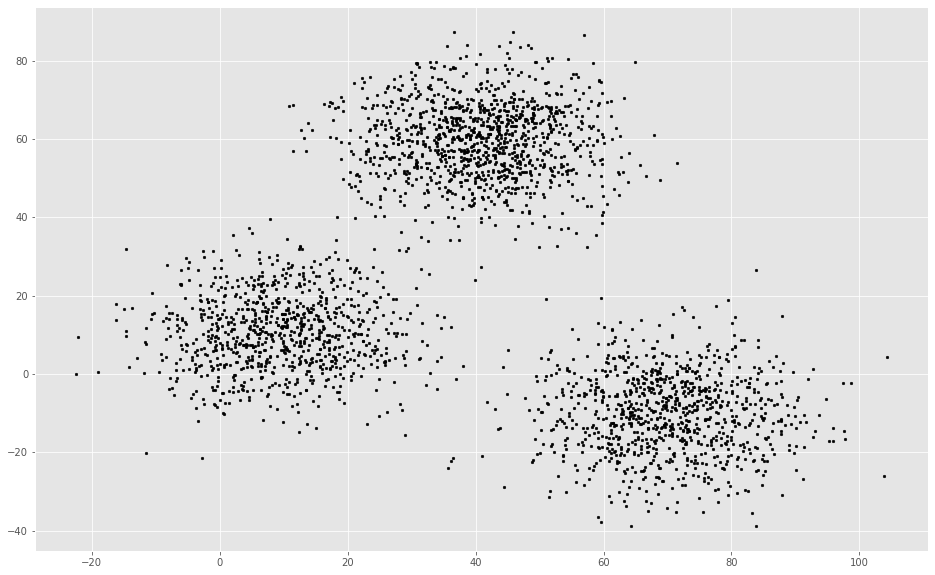

In [16]:
plt.figure(figsize=(16, 10))

f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c = 'black', s=7)

In [17]:
# 유클리드 거리 계산
def dist(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

# 클러스터의 수
k = 3

# 첫 중심의 X좌표
C_x = np.random.randint(0, np.max(X-20), size=k)

# 첫 중심의 Y좌표
C_y = np.random.randint(0, np.max(X)-20, size=k)

# 첫 중심의 좌표 출력
C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

[[36. 58.]
 [19.  3.]
 [81. 28.]]


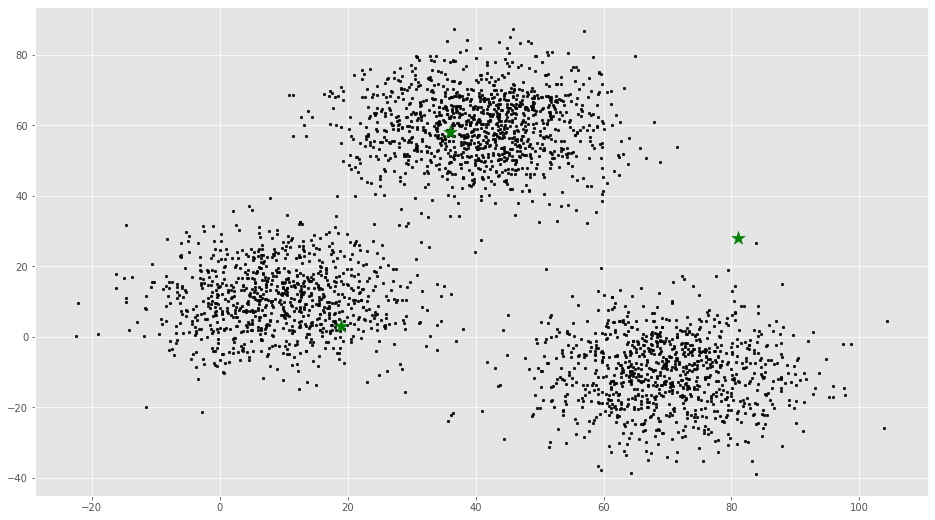

In [18]:
# 첫 중심과 데이터 시각화
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [19]:
# 업데이트 될 때마다 중심값 저장하기 위한 변수
C_old = np.zeros(C.shape)

# 클러스터 label
clusters = np.zeros(len(X))

# 기존 중심점과 새 중심점 사이의 거리
error = dist(C, C_old, None)

while error != 0:
    for i in range(len(X)):
        # point와 클러스터 사이의 거리
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)
    
    # 평균값으로 새로운 클러스터 찾기
    for i in range(k):
        # 특정 클러스터에 해당하는 points의 좌표 배열
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

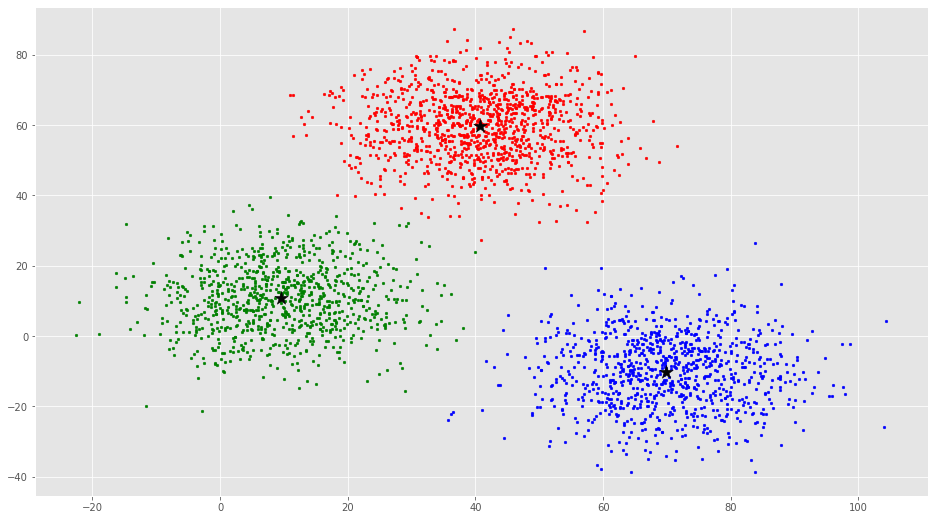

In [22]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

### The scikit-learn approach 1)

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

### The scikit-learn approach 2)

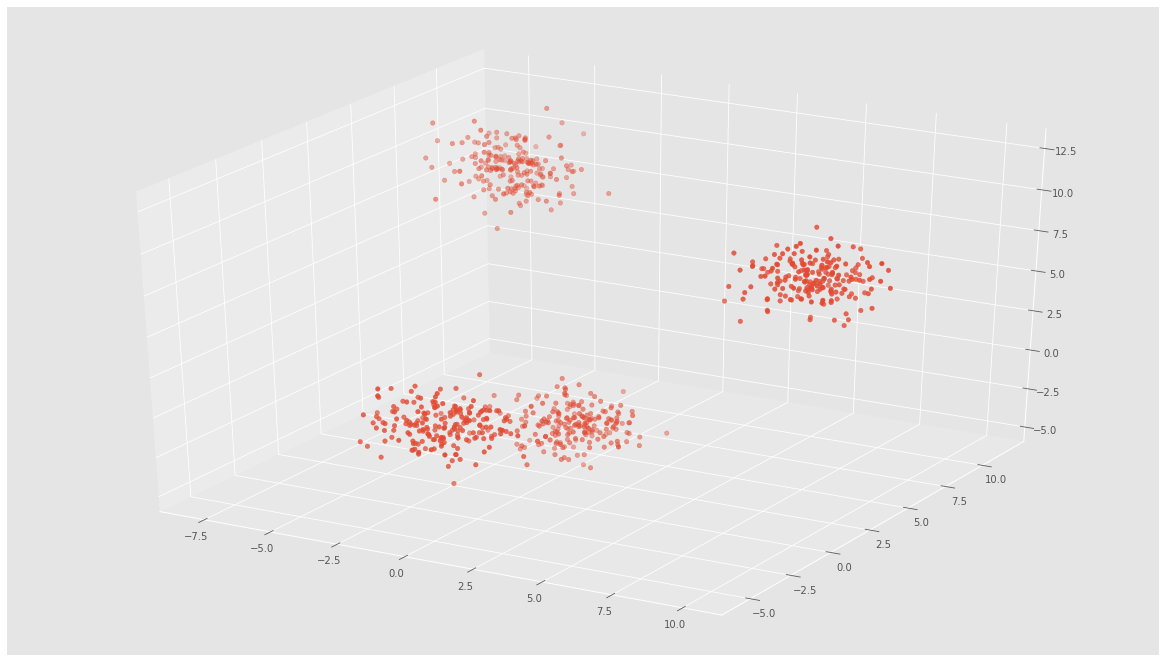

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

# 데이터셋 만들기
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_